# Full data analysis in Python by Jayson Piper
Firstly I looked on Kaggle for a data set and found and Amazon delivery time data set that I liked. (https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset) It has over 43,000 rows, so it is a nice large set of data.
    Using this data set I will be identifying what factors effect the delivery time from pick up to delivery to the customer. Looking at weather and traffic conditions as well as vehicle type and product category.

### Firstly I will be importing the libraries I will be using in this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Next I will import my data set.

In [2]:
amazon = pd.read_csv('amazon_delivery.csv')

### Now I will check everything has worked as it should have.

In [3]:
amazon.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
amazon.tail()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen
43738,nsyz997960170,23,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,17:10:00,17:15:00,Fog,Medium,scooter,Metropolitian,180,Cosmetics


In [5]:
amazon.sample(5)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
2126,ldxx648232776,36,4.5,17.459710,78.368855,17.469710,78.378855,2022-03-21,09:40:00,09:45:00,Windy,Low,van,Urban,115,Skincare
24314,pnsw590741238,25,4.7,19.103249,72.846749,19.163249,72.906749,2022-03-13,22:00:00,22:05:00,Sunny,Jam,scooter,Metropolitian,70,Jewelry
26727,bctt193303339,26,4.7,19.055831,72.833984,19.115831,72.893984,2022-03-13,23:40:00,23:55:00,Sandstorms,Low,motorcycle,Other,95,Electronics
21626,pzgd991877945,24,4.6,0.000000,0.000000,0.060000,0.060000,2022-02-17,19:25:00,19:40:00,Sandstorms,Jam,scooter,Urban,145,Jewelry
7295,zmfy302009946,35,4.8,23.234631,77.401663,23.344631,77.511663,2022-02-12,21:25:00,21:40:00,Cloudy,Jam,motorcycle,Metropolitian,230,Pet Supplies


### I want to check how clean the data is. Firstly I will check how many NULL values there are by using '.INFO'

In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


Looking at the information supplied by this i can see that there are very few NULL values. 54 for Agent rating and 91 for weather. As this is such a large data set I will just remove these entries. It comes to less than a third of a percent of the data set. There are also longitude and latitude figures i will not be using. I will not be using the order time or the pick up time so I will remove these columns. The data type for the order date column also needs changing. I will also tidy up the column names.

### I will now check the data using '.DESCRIBE'

In [7]:
amazon.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [8]:
amazon.describe(include = 'O')

,Order_ID,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Category
count,43739,43739,43739,43739,43648,43739,43739,43739,43739
unique,43739,44,177,193,6,5,4,4,16
top,nsyz997960170,2022-03-15,21:55:00,21:30:00,Fog,Low,motorcycle,Metropolitian,Electronics
freq,1,1141,460,481,7440,14999,25527,32698,2849


As I start to clean this data I will create a duplicate dataframe to uphold the integrity of the original.

### 

### Whilst doing this I will remove the null values using '.dropna'

In [9]:
amazonwork = amazon.dropna()

And to check this has worked as expected...

In [10]:
amazonwork.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [11]:
amazonwork.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43594 non-null  object 
 1   Agent_Age        43594 non-null  int64  
 2   Agent_Rating     43594 non-null  float64
 3   Store_Latitude   43594 non-null  float64
 4   Store_Longitude  43594 non-null  float64
 5   Drop_Latitude    43594 non-null  float64
 6   Drop_Longitude   43594 non-null  float64
 7   Order_Date       43594 non-null  object 
 8   Order_Time       43594 non-null  object 
 9   Pickup_Time      43594 non-null  object 
 10  Weather          43594 non-null  object 
 11  Traffic          43594 non-null  object 
 12  Vehicle          43594 non-null  object 
 13  Area             43594 non-null  object 
 14  Delivery_Time    43594 non-null  int64  
 15  Category         43594 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.7+ MB


By removing all of the NULL values I have lost only 145 rows which still leaves me over 43,500 to work with, I am happy with that as this is only a portfolio project.

### I will now remove the columns I am not interested in using '.DROP'.

In [12]:
amazonwork = amazonwork.drop(columns=['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Time', 'Pickup_Time'])

And to check if that worked...

In [13]:
amazonwork.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       43594 non-null  object 
 1   Agent_Age      43594 non-null  int64  
 2   Agent_Rating   43594 non-null  float64
 3   Order_Date     43594 non-null  object 
 4   Weather        43594 non-null  object 
 5   Traffic        43594 non-null  object 
 6   Vehicle        43594 non-null  object 
 7   Area           43594 non-null  object 
 8   Delivery_Time  43594 non-null  int64  
 9   Category       43594 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.7+ MB


### Now i want to change the data type for the date column using '.TO_DATETIME' and to test if it worked.

In [14]:
amazonwork['Order_Date'] = pd.to_datetime(amazonwork['Order_Date'])

In [15]:
amazonwork.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       43594 non-null  object        
 1   Agent_Age      43594 non-null  int64         
 2   Agent_Rating   43594 non-null  float64       
 3   Order_Date     43594 non-null  datetime64[ns]
 4   Weather        43594 non-null  object        
 5   Traffic        43594 non-null  object        
 6   Vehicle        43594 non-null  object        
 7   Area           43594 non-null  object        
 8   Delivery_Time  43594 non-null  int64         
 9   Category       43594 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 3.7+ MB


### I now want to rename a few columns to make this more user friendly. I will use '.RENAME', and test it worked.

In [16]:
amazonwork = amazonwork.rename(columns={'Agent_Age':'Courier_Age'})

In [17]:
amazonwork = amazonwork.rename(columns={'Agent_Rating':'Courier_Rating'})

In [53]:
amazonwork = amazonwork.rename(columns={'Area':'Urban_Area'})

In [54]:
amazonwork = amazonwork.rename(columns={'Category':'Product_Category'})

In [55]:
amazonwork.head()

,Order_ID,Courier_Age,Courier_Rating,Order_Date,Weather,Traffic,Vehicle,Urban_Area,Delivery_Time,Product_Category
0,ialx566343618,37,4.9,2022-03-19,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,2022-03-25,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,2022-03-19,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,2022-04-05,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,2022-03-26,Cloudy,High,scooter,Metropolitian,150,Toys


I am now happy with how the data is looking.

 ### Lets see how courier age and rating affects the delivery time.

<Axes: xlabel='Courier_Age', ylabel='Delivery_Time'>

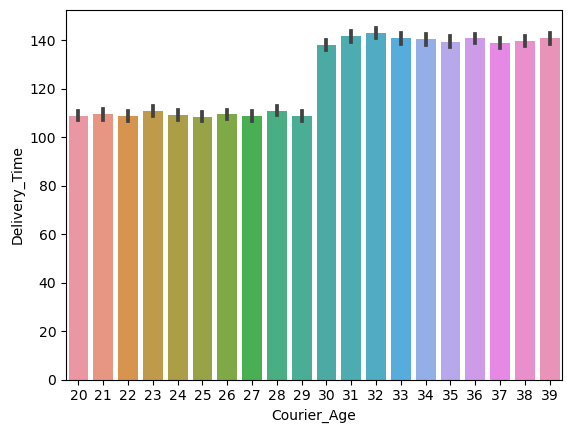

In [56]:
sns.barplot(x='Courier_Age', y='Delivery_Time',data=amazonwork)

The above chart shows that the quicker deliveries are made by the younger couriers. this could mean that younger, fitter couriers can move quicker, or it could mean that older couriers drive slower.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2.5'),
  Text(1, 0, '2.6'),
  Text(2, 0, '2.7'),
  Text(3, 0, '2.8'),
  Text(4, 0, '2.9'),
  Text(5, 0, '3.0'),
  Text(6, 0, '3.1'),
  Text(7, 0, '3.2'),
  Text(8, 0, '3.3'),
  Text(9, 0, '3.4'),
  Text(10, 0, '3.5'),
  Text(11, 0, '3.6'),
  Text(12, 0, '3.7'),
  Text(13, 0, '3.8'),
  Text(14, 0, '3.9'),
  Text(15, 0, '4.0'),
  Text(16, 0, '4.1'),
  Text(17, 0, '4.2'),
  Text(18, 0, '4.3'),
  Text(19, 0, '4.4'),
  Text(20, 0, '4.5'),
  Text(21, 0, '4.6'),
  Text(22, 0, '4.7'),
  Text(23, 0, '4.8'),
  Text(24, 0, '4.9'),
  Text(25, 0, '5.0')])

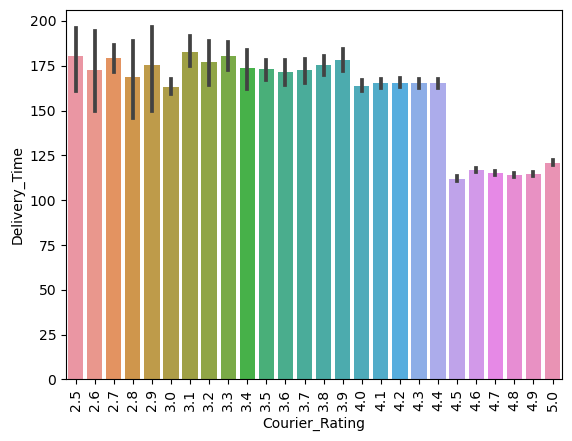

In [75]:
sns.barplot(x='Courier_Rating', y='Delivery_Time',data=amazonwork)
plt.xticks(rotation=90)

This shows that the delivery time reduces as the courier rating goes up. This suggest that the higher rated courier deliver faster. Or that courier speed is a main factor when the ratings are given.
    Now lets look at a few other factors.

###  Now lets look at a few other factors.

<Axes: xlabel='Weather', ylabel='Delivery_Time'>

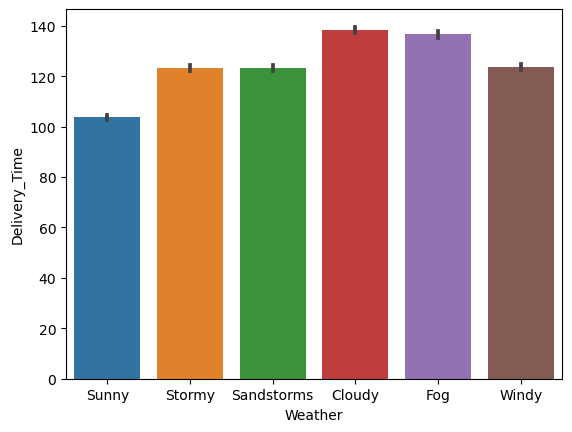

In [58]:
sns.barplot(x='Weather', y='Delivery_Time',data=amazonwork)

Looking at the weather it shows that sunny weather allows for the fastest delivery times, conversely, cloudy or foggy weather slow the delivery time down the most.

<Axes: xlabel='Traffic', ylabel='Delivery_Time'>

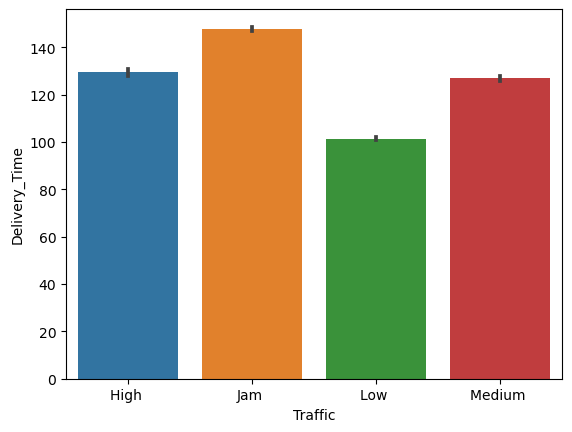

In [59]:
sns.barplot(x='Traffic', y='Delivery_Time',data=amazonwork)

looking at the traffic there are no surprises. Traffic jams and high traffic mean the slowest delivery times, followed by medium traffic, with low traffic being the fastest deliveries.

<Axes: xlabel='Vehicle', ylabel='Delivery_Time'>

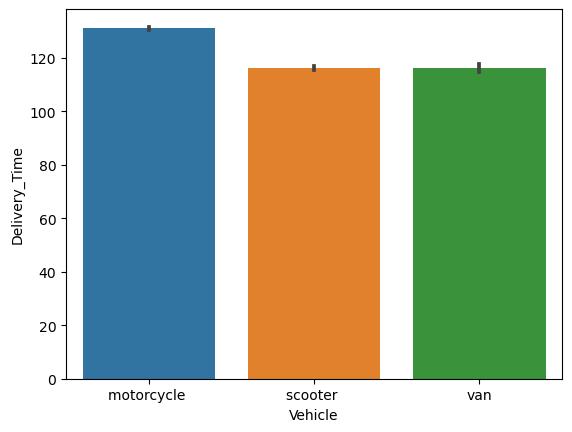

In [82]:
sns.barplot(x='Vehicle', y='Delivery_Time',data=amazonwork)

This chart was surprising to me. It shows that the slowest vehicle type is a motorcycle, with scooters and vans being about the same. It would be interesting to know their definitions of a scooter and a Motorcycle. Vans being quicker that Motorcycles was surprising, however this could be because of the limited carrying capacity, and could mean vans have to go back to the depot less frequently.

<Axes: xlabel='Urban_Area', ylabel='Delivery_Time'>

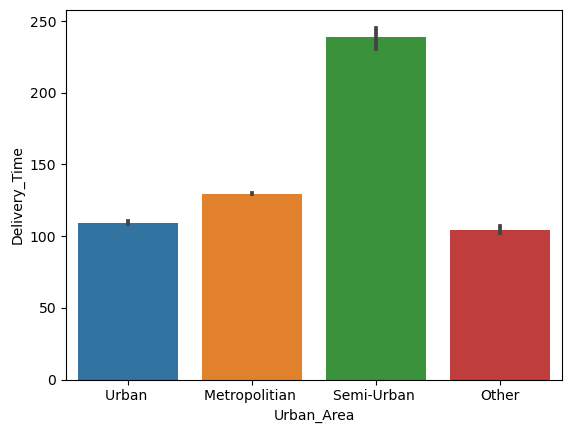

In [61]:
sns.barplot(x='Urban_Area', y='Delivery_Time',data=amazonwork)

Not knowing how, whoever compiled the data set, differentiates between the categories makes it difficult to interpret this chart, other than saying semi-urban is the slowest area for deliveries.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Cosmetics'),
  Text(4, 0, 'Toys'),
  Text(5, 0, 'Snacks'),
  Text(6, 0, 'Shoes'),
  Text(7, 0, 'Apparel'),
  Text(8, 0, 'Jewelry'),
  Text(9, 0, 'Outdoors'),
  Text(10, 0, 'Grocery'),
  Text(11, 0, 'Books'),
  Text(12, 0, 'Kitchen'),
  Text(13, 0, 'Home'),
  Text(14, 0, 'Pet Supplies'),
  Text(15, 0, 'Skincare')])

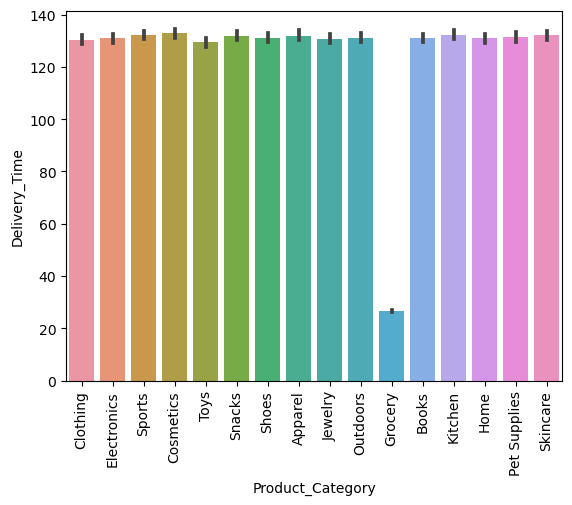

In [74]:
sns.barplot(x='Product_Category', y='Delivery_Time',data=amazonwork),
plt.xticks(rotation=90)

This shows that grocery is by far the category with the fastest delivery times. To me this suggests, as grocery is mostly perishable, there are probably more pick up points for the grocery category. For example, groceries could be picked up from a local supermarket down the road, where as everything else comes from a centralised depot. 

## My conclusions

Looking at the above data some things were obvious, some were surprising. Traffic affects the delivery time as we would expect, so do weather conditions. Better traffic conditions mean faster deliveries. As do better weather conditions. The courier age and rating also affect the delivery times as we would expect. Younger and higher rated couriers being faster than lower rated and older couriers. The vehicle breakdown was surprising with motorcycles being the slowest vehicle type and vans and scooters being faster. As we do not know how scooters and motorcycles were differentiated between each other. As stated before, this could mean vans are not going back to do pick ups as often as the motorcycles, giving them a lower delivery time average. With scooters being quicker than motorcycles too, is it possible scooters do more grocery deliveries ? They are after all the fastest deliveries by far. We also do not know how they define the urban areas, it would be nice to know as this seems a little weird that semi-urban areas provide slower delivery times than urban and metropolitan areas. All the categories seem about the same delivery time average, except for the grocery product type. As mentioned earlier, this suggests all products are stored at a central hub and delivered from there, except for the groceries. I would say the groceries are picked up from more locations, shops or supermarkets, making them nearer to the drop off points, thus decreasing the delivery time. I believe the delivering depot could use this information to let customers know an ETA of their delivery. If they know the variables, such as weather, vehicle, traffic, they could roughly let the customer know when their delivery will arrive. This would be especially helpful with grocery deliveries, these being perishable. Also, Looking at the weather column, included is 'sandstorm'. this would suggest a hot climate, making the ETA of perishable goods even more important to know.